## Step 1: Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Importing database 

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


dependent var: survived 

independent var: PClass,Sex, Age, SibSp, Ticket, Fare 
(rest columns can be ignored since the information they contain don't have an impact on survival chances

In [7]:
df = df.drop(columns = ['PassengerId' , 'Name' , 'Ticket' , 'Cabin'])

In [8]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Step 3: Handling null values

In [35]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [36]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [58]:
#null values handling in age column 
#age is float datatype column

df["Age"].fillna(df["Age"].mean(),inplace=True)

In [59]:
#null values handling in embarked column 
#embarked is categorical column 
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [60]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [61]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


## Step 4: Data visualisation 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

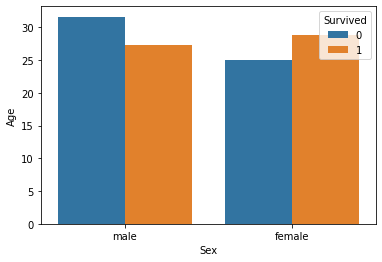

In [13]:
sns.barplot(data=df,x=df.Sex,y=df.Age,hue=df.Survived,ci=None)

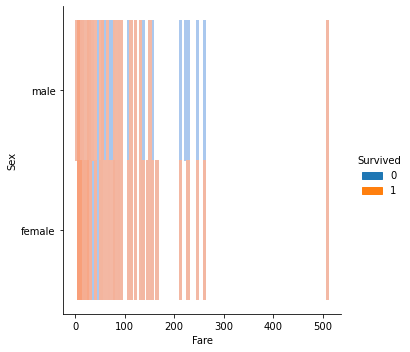

In [18]:
sns.displot(data=df,x=df.Fare,y=df.Sex,hue=df.Survived)

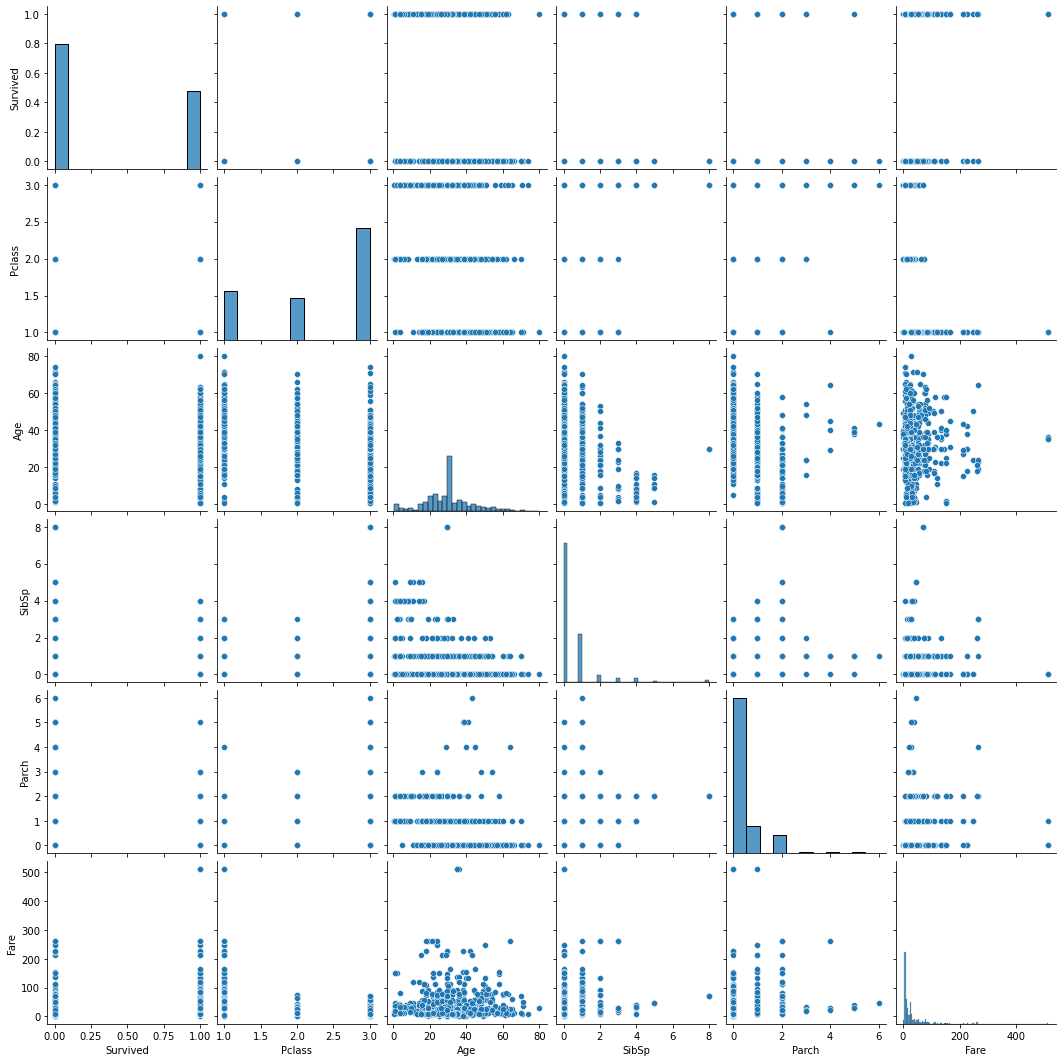

In [44]:
sns.pairplot(data=df,dropna=True)

<AxesSubplot:>

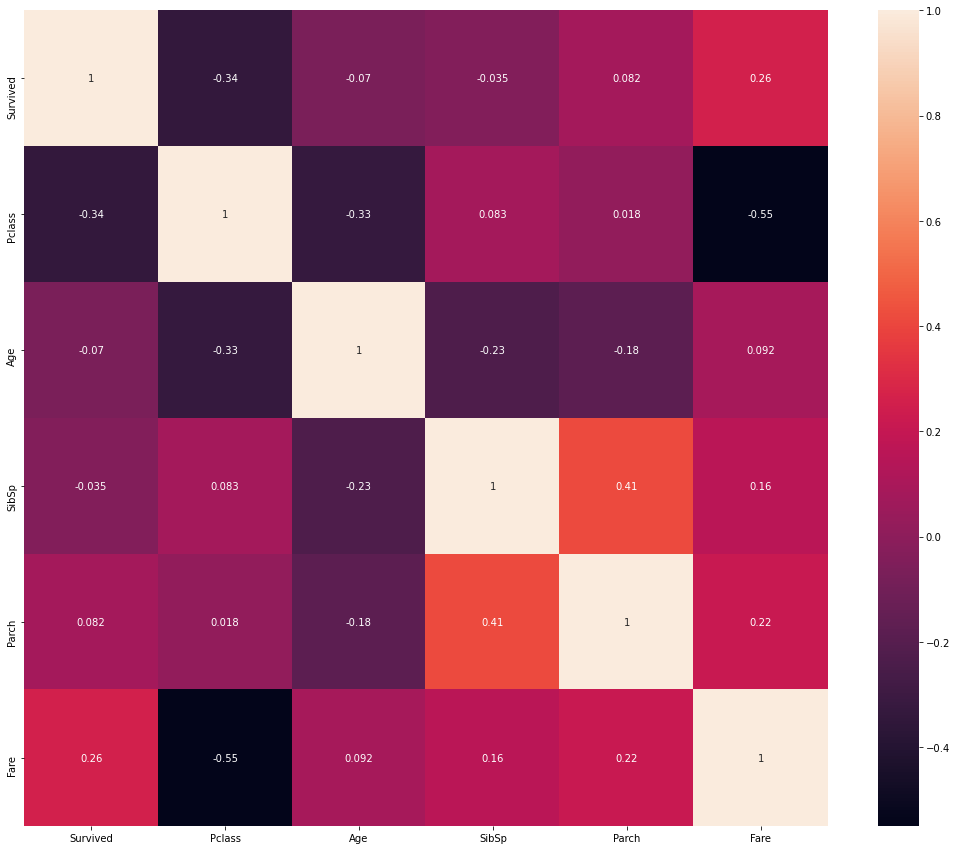

In [17]:
corr=df.corr()
plt.subplots(figsize=(18,15))
sns.heatmap(corr,annot=True)

## Step 5: Outlier detection 

In [51]:
df.median()

Survived     0.000000
Pclass       3.000000
Age         29.699118
SibSp        0.000000
Parch        0.000000
Fare        14.454200
dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

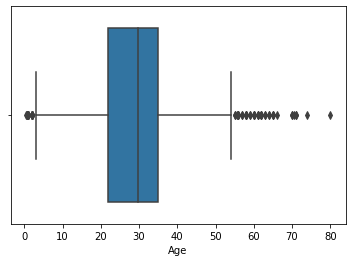

In [62]:
#taking only numeric columns since barplots can be made for only numeric columns

sns.boxplot(df.Age)

In [63]:
#replacement with median method 
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)
IQR=q3-q1

upperlim=q3+1.5*IQR
lowerlim=q1-1.5*IQR

df["Age"]=np.where(df.Age>upperlim,29.699118,df.Age)
df["Age"]=np.where(df.Age<lowerlim,29.699118,df.Age)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

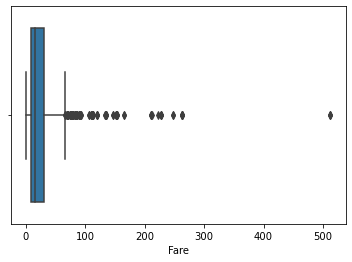

In [77]:
sns.boxplot(df.Fare)

In [79]:
#replacement with median method 
q1=df.Fare.quantile(0.25)
q3=df.Fare.quantile(0.75)
IQR=q3-q1

upperlim=q3+1.5*IQR
lowerlim=q1-1.5*IQR

df["Fare"]=np.where(df.Fare>upperlim,14.454200,df.Fare)

##  Step 6:Splitting Dependent and Independent variables

In [81]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,14.4542,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [94]:
x=df.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,14.4542,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [95]:
y=df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Step 7:Encoding 

In [96]:
#label encoding on sex column 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x["Sex"]=le.fit_transform(x["Sex"])
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,S
1,1,0,38.000000,1,0,14.4542,C
2,3,0,26.000000,0,0,7.9250,S
3,1,0,35.000000,1,0,53.1000,S
4,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,S
887,1,0,19.000000,0,0,30.0000,S
888,3,0,29.699118,1,2,23.4500,S
889,1,1,26.000000,0,0,30.0000,C


In [97]:
#one hot encoding on Embarked column 

embarked=pd.get_dummies(x["Embarked"],drop_first=True)
x=pd.concat([x,embarked],axis=1)
x.drop(["Embarked"],axis=1,inplace=True)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.000000,1,0,7.2500,0,1
1,1,0,38.000000,1,0,14.4542,0,0
2,3,0,26.000000,0,0,7.9250,0,1
3,1,0,35.000000,1,0,53.1000,0,1
4,3,1,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,1
887,1,0,19.000000,0,0,30.0000,0,1
888,3,0,29.699118,1,2,23.4500,0,1
889,1,1,26.000000,0,0,30.0000,0,0


## Step 8: Feature scaling 

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.82737724,  0.73769513, -0.70858401, ..., -0.79755374,
        -0.30756234,  0.61583843],
       [-1.56610693, -1.35557354,  0.92494776, ..., -0.23055642,
        -0.30756234, -1.62380254],
       [ 0.82737724, -1.35557354, -0.30020106, ..., -0.74442873,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -1.35557354,  0.07746307, ...,  0.47744647,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.73769513, -0.30020106, ...,  0.99295581,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.73769513,  0.31237335, ..., -0.75820188,
         3.25137334, -1.62380254]])

## Step 9: Splitting data into train and test

In [99]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [88]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 8), (268, 8), (623, 1), (268, 1))

In [100]:
x_train

array([[-1.56610693e+00,  7.37695132e-01,  2.25219232e+00, ...,
         7.21427989e-01, -3.07562343e-01,  6.15838425e-01],
       [-1.56610693e+00, -1.35557354e+00,  2.04800085e+00, ...,
        -2.30556425e-01, -3.07562343e-01, -1.62380254e+00],
       [ 8.27377244e-01,  7.37695132e-01,  7.74631084e-02, ...,
         2.32304862e+00, -3.07562343e-01,  6.15838425e-01],
       ...,
       [ 8.27377244e-01,  7.37695132e-01,  7.74630724e-02, ...,
        -7.59516233e-01,  3.25137334e+00, -1.62380254e+00],
       [ 8.27377244e-01, -1.35557354e+00,  7.20756290e-01, ...,
         1.28898315e-03, -3.07562343e-01,  6.15838425e-01],
       [-3.69364841e-01,  7.37695132e-01,  7.74631084e-02, ...,
         1.70128926e+00, -3.07562343e-01,  6.15838425e-01]])